<a href="https://colab.research.google.com/github/tigranvartanyan/popytka1/blob/main/%D0%9A%D0%BE%D0%BF%D0%B8%D1%8F_%D0%B1%D0%BB%D0%BE%D0%BA%D0%BD%D0%BE%D1%82%D0%B0_%22Untitled15_ipynb%22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [474]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [475]:
import pandas as pd

In [476]:
%cd gdrive/MyDrive/

[Errno 2] No such file or directory: 'gdrive/MyDrive/'
/content/gdrive/MyDrive


In [477]:
import numpy as np

In [478]:
import seaborn as sns

In [479]:
import matplotlib.pyplot as plt

In [480]:
from sklearn.preprocessing import StandardScaler, LabelEncoder

In [481]:
from sklearn.decomposition import PCA

In [482]:
from sklearn.metrics import mean_squared_error

In [483]:
from sklearn.model_selection import train_test_split
from sklearn.dummy import DummyClassifier
from sklearn.linear_model import LogisticRegression

In [484]:
from sklearn.linear_model import LinearRegression
from sklearn.dummy import DummyRegressor

Набор данных состоит из множества записей, каждая из которых включает объективные характеристики произведенной шоколадной плитки и оценку ее качества, выставленную экспертом. Модель должна предсказывать экспертную оценку на основе имеющихся объективных данных.

In [485]:
B = pd.read_csv('flavors_of_cacao.csv')

In [486]:
B

,Company \n(Maker-if known),Specific Bean Origin\nor Bar Name,REF,Review\nDate,Cocoa\nPercent,Company\nLocation,Rating,Bean\nType,Broad Bean\nOrigin
0,A. Morin,Agua Grande,1876,2016,63%,France,3.75,,Sao Tome
1,A. Morin,Kpime,1676,2015,70%,France,2.75,,Togo
2,A. Morin,Atsane,1676,2015,70%,France,3.00,,Togo
3,A. Morin,Akata,1680,2015,70%,France,3.50,,Togo
4,A. Morin,Quilla,1704,2015,70%,France,3.50,,Peru
...,...,...,...,...,...,...,...,...,...
1790,Zotter,Peru,647,2011,70%,Austria,3.75,,Peru
1791,Zotter,Congo,749,2011,65%,Austria,3.00,Forastero,Congo
1792,Zotter,Kerala State,749,2011,65%,Austria,3.50,Forastero,India
1793,Zotter,Kerala State,781,2011,62%,Austria,3.25,,India


In [487]:
B.shape

(1795, 9)

Набор данных состоит из 9 различных категориальных и непрерывных праметров 1795 шоколадных плиток

In [488]:
B.columns

Index(['Company \n(Maker-if known)', 'Specific Bean Origin\nor Bar Name',
       'REF', 'Review\nDate', 'Cocoa\nPercent', 'Company\nLocation', 'Rating',
       'Bean\nType', 'Broad Bean\nOrigin'],
      dtype='object')

In [489]:
B.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1795 entries, 0 to 1794
Data columns (total 9 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Company 
(Maker-if known)         1795 non-null   object 
 1   Specific Bean Origin
or Bar Name  1795 non-null   object 
 2   REF                               1795 non-null   int64  
 3   Review
Date                       1795 non-null   int64  
 4   Cocoa
Percent                     1795 non-null   object 
 5   Company
Location                  1795 non-null   object 
 6   Rating                            1795 non-null   float64
 7   Bean
Type                         1794 non-null   object 
 8   Broad Bean
Origin                 1794 non-null   object 
dtypes: float64(1), int64(2), object(6)
memory usage: 126.3+ KB


In [490]:
B.dtypes

Company \n(Maker-if known)            object
Specific Bean Origin\nor Bar Name     object
REF                                    int64
Review\nDate                           int64
Cocoa\nPercent                        object
Company\nLocation                     object
Rating                               float64
Bean\nType                            object
Broad Bean\nOrigin                    object
dtype: object

**target: Rating**

Numerical **columns**

In [491]:
num_cols = B.select_dtypes(exclude='object')
num_cols.shape

(1795, 3)

In [492]:
num_cols.describe()

,REF,Review\nDate,Rating
count,1795.000000,1795.000000,1795.000000
mean,1035.904735,2012.325348,3.185933
std,552.886365,2.927210,0.478062
min,5.000000,2006.000000,1.000000
25%,576.000000,2010.000000,2.875000
50%,1069.000000,2013.000000,3.250000
75%,1502.000000,2015.000000,3.500000
max,1952.000000,2017.000000,5.000000


Подготовка данных

Номер экспертной записи ('REF') не имеет отношения к качеству шоколада и будет исключен  из дальнейшего анализа

In [493]:
B.isna().sum()

Company \n(Maker-if known)           0
Specific Bean Origin\nor Bar Name    0
REF                                  0
Review\nDate                         0
Cocoa\nPercent                       0
Company\nLocation                    0
Rating                               0
Bean\nType                           1
Broad Bean\nOrigin                   1
dtype: int64

In [494]:
B['Rating'].describe()

count    1795.000000
mean        3.185933
std         0.478062
min         1.000000
25%         2.875000
50%         3.250000
75%         3.500000
max         5.000000
Name: Rating, dtype: float64

In [495]:
B.size

16155

In [496]:
BRating = B['Rating']
BRating

0       3.75
1       2.75
2       3.00
3       3.50
4       3.50
        ... 
1790    3.75
1791    3.00
1792    3.50
1793    3.25
1794    3.00
Name: Rating, Length: 1795, dtype: float64

In [497]:
BRating.max()

5.0

In [498]:
BRating.min()

1.0

In [499]:
BRating.mean()

3.185933147632312

Это среднее значение будет использовано для константного предсказания и определения его погрешности

In [ ]:
BCoca = B['Cocoa\nPercent']
BCoca

In [ ]:
B['Cocoa\nPercent'].value_counts()

**Cacao data visualization**

<Axes: ylabel='Cocoa\nPercent'>

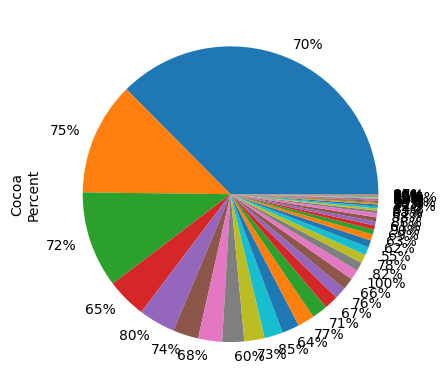

In [611]:
B['Cocoa\nPercent'].value_counts().plot(kind='pie')

Данные в столбце Cocoa\nPercent представляются  важными, однако их нельзя непосредственно использовать как числовые, так как из-за наличия знака процента "%", непосредственно примыкающего к цифрам, они воспринимаются как строковые (object). Следующие манипуляции позволяют преобразовать их во float для дальнейшей работы. Будет подготовлен одномерный массив DD нужной длины (заполнен нулями с плавающей запятой), а потом на их место будут поставлены цифры из записи, содержащей цифры и знак процента. После удаления знакак процента строку преобразуем в числовую переменную.

In [503]:
DD = np.zeros(1795)

In [504]:
for i in range(1795):
  DD[i] = float(BCoca[i].replace('%', ''))

In [505]:
DD

array([63., 70., 70., ..., 65., 62., 65.])

In [506]:
type(DD[6])

numpy.float64

Теперь это числа, с которыми можно будет работать. Из очищенных данных составляем рабочий массив 'BB'.

In [507]:
BB = pd.DataFrame({
    "Origin": B['Specific Bean Origin\nor Bar Name'],
    "Percent": pd.Series(DD),
    "Location": B['Company\nLocation'],
    "Year": B['Review\nDate'],
    "Rating":B['Rating']
})

In [ ]:
BB['Percent'].value_counts()

In [510]:
BB

,Origin,Percent,Location,Year,Rating
0,Agua Grande,63.0,France,2016,3.75
1,Kpime,70.0,France,2015,2.75
2,Atsane,70.0,France,2015,3.00
3,Akata,70.0,France,2015,3.50
4,Quilla,70.0,France,2015,3.50
...,...,...,...,...,...
1790,Peru,70.0,Austria,2011,3.75
1791,Congo,65.0,Austria,2011,3.00
1792,Kerala State,65.0,Austria,2011,3.50
1793,Kerala State,62.0,Austria,2011,3.25


In [511]:
BB['Rating'].value_counts()

3.50    392
3.00    341
3.25    303
2.75    259
3.75    210
2.50    127
4.00     98
2.00     32
2.25     14
1.50     10
1.00      4
1.75      3
5.00      2
Name: Rating, dtype: int64

In [512]:
BB['Year'].describe()

count    1795.000000
mean     2012.325348
std         2.927210
min      2006.000000
25%      2010.000000
50%      2013.000000
75%      2015.000000
max      2017.000000
Name: Year, dtype: float64

**Визуализации**

In [ ]:
BB['Location'].value_counts().plot(kind='pie');

In [ ]:
BB['Percent'].value_counts().plot(kind='pie');

In [ ]:
BB['Rating'].value_counts().plot(kind='pie')

In [ ]:
BB['Rating'].plot.hist()

In [517]:
B['Rating'].mean(0)

3.185933147632312

In [ ]:
BB['Percent'].plot.hist()

**Distibutions of num features**

In [ ]:
sns.displot(BB['Rating'], bins=16, color='r')

In [ ]:
sns.displot(BB['Percent'], bins=40, color='b')

In [ ]:
sns.displot(BB['Year'], bins=11, color='g')

**Scatterplots with target**

<Axes: xlabel='Percent', ylabel='Rating'>

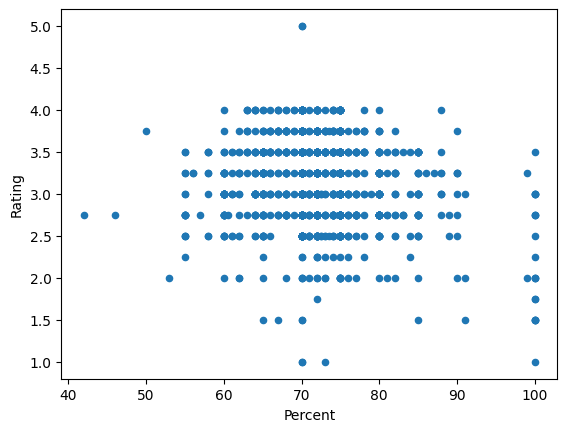

In [536]:
BB.plot("Percent", "Rating", kind="scatter")

Четкой корреляции между процентом содержания какао и оценкой качества шоколада экспертами нет. Большая часть плиток содержит от 50 до 90 процентов какао. Также можно отметить, что высшую оценку 5 и низшую
1 получили небольшое число плиток. Роль информации, содержащейся в категориальных переменных - месте выращивания какое-бобов и месте производства шоколадных плиток - пока неясна.  

Образуем массив 'BBB' из одного признака - процентногго содержания какао и одной целевой переменной - экспертной оценки качества шоколадной плитки

In [591]:
BBB = pd.DataFrame({
    "Percent": pd.Series(DD),
    "Year": B['Review\nDate']})

In [ ]:
BBB

In [593]:
BBB.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1795 entries, 0 to 1794
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Percent  1795 non-null   float64
 1   Year     1795 non-null   int64  
dtypes: float64(1), int64(1)
memory usage: 28.2 KB


Разобьем данные на тренировочные и тестовые

In [595]:
X_train, X_test, y_train, y_test = train_test_split(BBB, BB['Rating'], random_state=1953, test_size=0.3)

In [596]:
X_train.head()

,Percent,Year
434,73.5,2010
455,72.0,2010
1072,72.0,2012
1692,65.0,2007
1471,67.0,2014


In [ ]:
y.plot(kind='kde', title='Rating')

Поскольку целевая переменная является числовой характеристикой, в качестве **метрики** естественно выбрать среднеквадратичное отклонение предсказаний целевой переменной от действительной оценки, выставленной экспертами. Предусматривать иные особые штрафы за отклонение в большую или меньшую сторону представляется нецелесообразным, так как занижение оценки также нежелательно, как и завышение.

Сначала посмотри, что дает **константное** предсказание

In [598]:
dummy = DummyRegressor(strategy='mean')
dummy.fit(X_train, y_train)
y_preds_dummy = dummy.predict(X_test)

In [599]:
mean_squared_error(y_test, y_preds_dummy)

0.23328244483379207

Теперь используем **линейную регрессию**

In [600]:
lr = LinearRegression()

In [601]:
lr.fit(X_train, y_train)
y_preds_lr = lr.predict(X_test)

In [602]:
mean_squared_error(y_test, y_preds_lr)

0.2229464025063182

In [603]:
reg = lr.fit(X_train, y_train)
reg.coef_

array([-0.01276689,  0.01481186])

Линейная регрессия дала некоторое снижение ошибки по сравнению с константой 0.22 против 0.23, но недостаточное.  

Графики, показывающие ошибки константы и линейной регрессии

Text(1.5, 3.5, 'the dummy predictions')

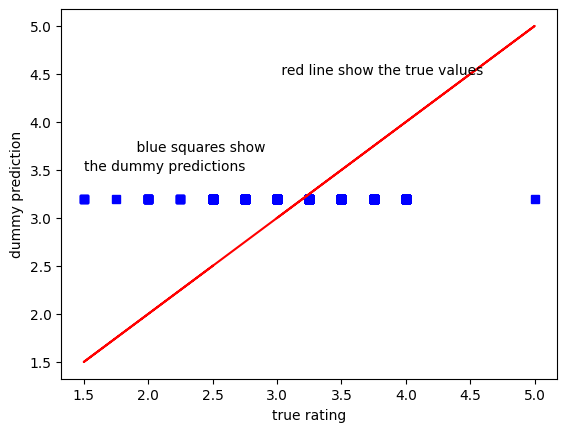

In [607]:
plt.plot(y_test, y_preds_dummy, 'bs', y_test, y_test, 'r')
plt.xlabel('true rating')
plt.ylabel('dummy prediction')
plt.text(3, 4.5, r' red line show the true values')
plt.text(1.5, 3.7, r'            blue squares show')
plt.text(1.5, 3.5, r'the dummy predictions')

Text(1.5, 3.5, 'the linear regression predictions')

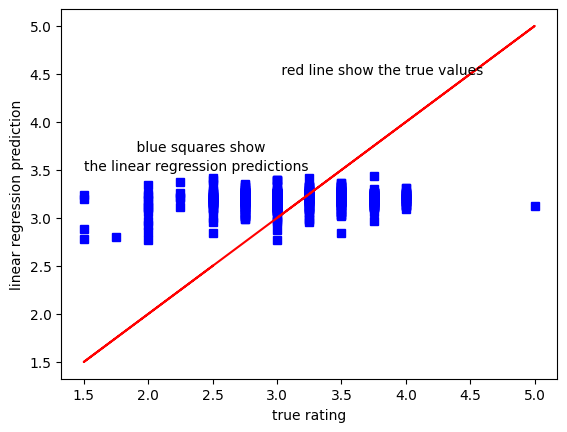

In [609]:
plt.plot(y_test, y_preds_lr, 'bs', y_test, y_test, 'r')
plt.xlabel('true rating')
plt.ylabel('linear regression prediction')
plt.text(3, 4.5, r' red line show the true values')
plt.text(1.5, 3.7, r'            blue squares show')
plt.text(1.5, 3.5, r'the linear regression predictions')

То же самое в одной рамке

Text(1.5, 3.5, 'the linear regression predictions')

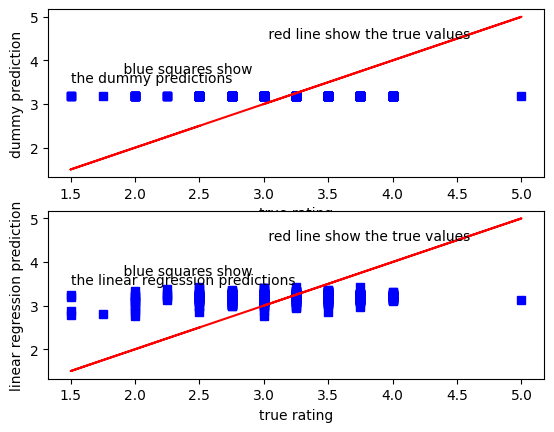

In [610]:
plt.figure()
plt.subplot(211)
plt.plot(y_test, y_preds_dummy, 'bs', y_test, y_test, 'r')
plt.xlabel('true rating')
plt.ylabel('dummy prediction')
plt.text(3, 4.5, r' red line show the true values')
plt.text(1.5, 3.7, r'            blue squares show')
plt.text(1.5, 3.5, r'the dummy predictions')

plt.subplot(212)
plt.plot(y_test, y_preds_lr, 'bs', y_test, y_test, 'r')
plt.xlabel('true rating')
plt.ylabel('linear regression prediction')
plt.text(3, 4.5, r' red line show the true values')
plt.text(1.5, 3.7, r'            blue squares show')
plt.text(1.5, 3.5, r'the linear regression predictions')

Надо использовать данные с категориальных столбцах